Enter the nodes: 16
1
X:100
Y:0
2
X:200
Y:0
3
X:300
Y:0
4
X:400
Y:0
5
X:500
Y:0
6
X:600
Y:0
7
X:700
Y:0
8
X:100
Y:100
9
X:200
Y:100
10
X:300
Y:100
11
X:400
Y:100
12
X:500
Y:100
13
X:600
Y:100
14
X:700
Y:100
15
X:0
Y:0
16
X:800
Y:0
Enter the ELEMENTS: 29
Enter the nodes one after the other corresponding to the element that is displayed


ELEMENT NUMBER: 1
Enter the NODE I:15
Enter the NODE II:1


ELEMENT NUMBER: 2
Enter the NODE I:1
Enter the NODE II:2


ELEMENT NUMBER: 3
Enter the NODE I:2
Enter the NODE II:3


ELEMENT NUMBER: 4
Enter the NODE I:3
Enter the NODE II:4


ELEMENT NUMBER: 5
Enter the NODE I:4
Enter the NODE II:5


ELEMENT NUMBER: 6
Enter the NODE I:5
Enter the NODE II:6


ELEMENT NUMBER: 7
Enter the NODE I:6
Enter the NODE II:7


ELEMENT NUMBER: 8
Enter the NODE I:7
Enter the NODE II:16


ELEMENT NUMBER: 9
Enter the NODE I:8
Enter the NODE II:9


ELEMENT NUMBER: 10
Enter the NODE I:9
Enter the NODE II:10


ELEMENT NUMBER: 11
Enter the NODE I:10
Enter the NODE II:11


ELEME

c:\users\vinay\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars




ELEMENT NUMBER: 17
Enter the NODE I:1
Enter the NODE II:9


ELEMENT NUMBER: 18
Enter the NODE I:2
Enter the NODE II:9


ELEMENT NUMBER: 19
Enter the NODE I:2
Enter the NODE II:10


ELEMENT NUMBER: 20
Enter the NODE I:3
Enter the NODE II:10


ELEMENT NUMBER: 21
Enter the NODE I:3
Enter the NODE II:11


ELEMENT NUMBER: 22
Enter the NODE I:4
Enter the NODE II:11


ELEMENT NUMBER: 23
Enter the NODE I:5
Enter the NODE II:11


ELEMENT NUMBER: 24
Enter the NODE I:5
Enter the NODE II:12


ELEMENT NUMBER: 25
Enter the NODE I:6
Enter the NODE II:12


ELEMENT NUMBER: 26
Enter the NODE I:6
Enter the NODE II:13


ELEMENT NUMBER: 27
Enter the NODE I:7
Enter the NODE II:13


ELEMENT NUMBER: 28
Enter the NODE I:7
Enter the NODE II:14


ELEMENT NUMBER: 29
Enter the NODE I:16
Enter the NODE II:14
Enter the Total number of nodes where Point loads are applied:1
Enter the Node numbers where Load is applied one by one:4


Force Input at Node:  4.0
enter the X force in the Node:0
enter the Y force in the N

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.25it/s]


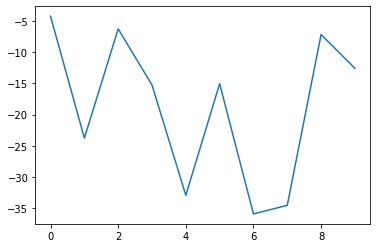

-35.89981325729328
[[  1. 100.   0.]
 [  2. 200.   0.]
 [  3. 300.   0.]
 [  4. 400.   0.]
 [  5. 500.   0.]
 [  6. 600.   0.]
 [  7. 700.   0.]
 [  8. 100.  27.]
 [  9. 200.  41.]
 [ 10. 300.  58.]
 [ 11. 400.  98.]
 [ 12. 500.  43.]
 [ 13. 600.  77.]
 [ 14. 700.  77.]
 [ 15.   0.   0.]
 [ 16. 800.   0.]]


In [18]:
import numpy as np
import math
from numpy.linalg import inv
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
area=1
E=10e6
nodes=int(input("Enter the nodes: "))

GLOBAL=np.zeros((nodes*2,nodes*2))
add=np.zeros((nodes*2,nodes*2))
joints=np.zeros((nodes,3))
small=np.zeros((2,2))

for i in range(nodes):
    print(i+1)
    joints[i][0]=i+1    #the joint number
    joints[i][1]=input("X:")
    joints[i][2]=input("Y:")
ELEMENT=int(input("Enter the ELEMENTS: "))
element=np.zeros((ELEMENT,9))
print("Enter the nodes one after the other corresponding to the element that is displayed")
for j in range(ELEMENT):
    print("\n")
    print("ELEMENT NUMBER:",j+1)
    element[j][0]=j+1
    element[j][1]=input("Enter the NODE I:")
    element[j][2]=input("Enter the NODE II:")
    #element[j][3]=input("Enter the angle   :")
    #element[j][3]=math.radians(element[j][3])
    try:
        element[j][3]=np.arctan((joints[int(element[j][2]-1)][2]-joints[int(element[j][1]-1)][2])/(joints[int(element[j][2]-1)][1]-joints[int(element[j][1]-1)][1]))
    except:
        element[j][3]=np.tan(90)
    element[j][4]=joints[int(element[j][1]-1)][1]
    element[j][5]=joints[int(element[j][1]-1)][2]
    element[j][6]=joints[int(element[j][2]-1)][1]
    element[j][7]=joints[int(element[j][2]-1)][2]
    element[j][8]=((element[j][4]-element[j][6])**2+(element[j][5]-element[j][7])**2)**0.5

Forces=np.zeros((nodes*2,1))
vi=int(input("Enter the Total number of nodes where Point loads are applied:"))
ForceNodenumbers=np.zeros((vi))
for i in range(vi):
    ForceNodenumbers[i]=int(input("Enter the Node numbers where Load is applied one by one:"))
for i in range(vi):
    print("\n")
    print("Force Input at Node: ",ForceNodenumbers[i])
    Forces[int(2*(ForceNodenumbers[i]-1))][0]=float(input("enter the X force in the Node:"))
    Forces[int((2*(ForceNodenumbers[i]-1))+1)][0]=float(input("enter the Y force in the Node:"))

def TRUSS(joints,element,GLOBAL,Forces,small,add):
    for i in range(ELEMENT):
        #print("Element:",element[i][0],"node connection:",element[i][1],element[i][2],"Angle:",np.degrees(element[i][3]),"L:",element[i][8])
        element[i][3]=np.arctan((joints[int(element[i][2]-1)][2]-joints[int(element[i][1]-1)][2])/(joints[int(element[i][2]-1)][1]-joints[int(element[i][1]-1)][1]))
        small[0][0]=round((np.cos(element[i][3])**2)*area*E/element[i][8],3)
        small[0][1]=round(np.cos(element[i][3])*np.sin(element[i][3])*area*E/element[i][8],3)
        small[1][0]=round(np.cos(element[i][3])*np.sin(element[i][3])*area*E/element[i][8],3)
        small[1][1]=round((np.sin(element[i][3])**2)*area*E/element[i][8],3)
        #print(small)
        #print(area*E/element[i][8])
        for x in range(nodes*2):
            for y in range(nodes*2):
                if(x==2*(element[i][1]-1) and y==2*(element[i][1]-1)):
                    add[x][y]=small[0][0]
                    add[x][y+1]=small[0][1]
                    add[x+1][y]=small[1][0]
                    add[x+1][y+1]=small[1][1]
                if(x==2*(element[i][2]-1) and y==2*(element[i][2]-1)):
                    add[x][y]=small[0][0]
                    add[x][y+1]=small[0][1]
                    add[x+1][y]=small[1][0]
                    add[x+1][y+1]=small[1][1]
                if(x==2*(element[i][1]-1) and y==2*(element[i][2]-1)):
                    add[x][y]=-small[0][0]
                    add[x][y+1]=-small[0][1]
                    add[x+1][y]=-small[1][0]
                    add[x+1][y+1]=-small[1][1]
                if(x==2*(element[i][2]-1) and y==2*(element[i][1]-1)):
                    add[x][y]=-small[0][0]
                    add[x][y+1]=-small[0][1]
                    add[x+1][y]=-small[1][0]
                    add[x+1][y+1]=-small[1][1]
        #print(add)
        GLOBAL=GLOBAL+add
        add.fill(0)
        small.fill(0)
    #print(GLOBAL)
    #GLOBAL=np.delete(GLOBAL, (7),axis=0)
    #GLOBAL=np.delete(GLOBAL, (6),axis=0)

    GLOBAL=np.delete(GLOBAL, (31),axis=0)
    GLOBAL=np.delete(GLOBAL, (30),axis=0)

    GLOBAL=np.delete(GLOBAL, (29),axis=0)
    GLOBAL=np.delete(GLOBAL, (28),axis=0)


    #GLOBAL=np.delete(GLOBAL, (7),axis=1)
    #GLOBAL=np.delete(GLOBAL, (6),axis=1)

    GLOBAL=np.delete(GLOBAL, (31),axis=1)
    GLOBAL=np.delete(GLOBAL, (30),axis=1)

    GLOBAL=np.delete(GLOBAL, (29),axis=1)
    GLOBAL=np.delete(GLOBAL, (28),axis=1)

    #Forces=np.delete(Forces, (7),axis=0)
    #Forces=np.delete(Forces, (6),axis=0)
    Forces=np.delete(Forces, (31),axis=0)
    Forces=np.delete(Forces, (30),axis=0)
    Forces=np.delete(Forces, (29),axis=0)
    Forces=np.delete(Forces, (28),axis=0)
    #print(GLOBAL)
    #print(Forces)
    Y=(np.dot(inv(GLOBAL),Forces))
    #print(joints)
    return Y[7][0]
O=[]
MinJoint=np.zeros((nodes,3))
MIN=30
for t in tqdm(range(10)):
    #MIN=20 #TRUSS(joints,element,GLOBAL,Forces,small,add)
    O.append(float(TRUSS(joints,element,GLOBAL,Forces,small,add)))
    #Here You have to input which nodes you may want to move
    #joints[0][1]=0+(-1**random.randint(1,2)*random.randint(1,25))
    #joints[0][2]=0+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[7][1]=100+(-1**random.randint(1,2)*random.randint(1,25))
    joints[7][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[8][1]=200+(-1**random.randint(1,2)*random.randint(1,25))
    joints[8][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[9][1]=300+(-1**random.randint(1,2)*random.randint(1,25))
    joints[9][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[10][1]=400+(-1**random.randint(1,2)*random.randint(1,25))
    joints[10][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[11][1]=500+(-1**random.randint(1,2)*random.randint(1,25))
    joints[11][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[12][1]=600+(-1**random.randint(1,2)*random.randint(1,25))
    joints[12][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[13][1]=700+(-1**random.randint(1,2)*random.randint(1,25))
    joints[13][2]=100+(-1**random.randint(1,2)*random.randint(1,80))
    
    #plt.scatter(joints[0][1],joints[0][2])
    #plt.scatter(joints[1][1],joints[1][2])
    #plt.scatter(joints[2][1],joints[2][2])
    if TRUSS(joints,element,GLOBAL,Forces,small,add) < MIN:
        MinJoints=joints
        MIN=TRUSS(joints,element,GLOBAL,Forces,small,add)

plt.plot(O)
plt.show()
print(np.min(O))
print(MinJoints)
#TRUSS(joints,element,GLOBAL,Forces,small,add)
#joints[0][1]=joints[0][1]+(-1**random.randint(1,2)*random.randint(1,20))
#joints[0][2]=joints[0][2]+(-1**random.randint(1,2)*random.randint(1,20))

In [4]:
MEMORY=element
print(element)

[[ 1.00000000e+00  1.50000000e+01  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.00000000e+02  0.00000000e+00
   1.00000000e+02]
 [ 2.00000000e+00  1.00000000e+00  2.00000000e+00  0.00000000e+00
   1.00000000e+02  0.00000000e+00  2.00000000e+02  0.00000000e+00
   1.00000000e+02]
 [ 3.00000000e+00  2.00000000e+00  3.00000000e+00  0.00000000e+00
   2.00000000e+02  0.00000000e+00  3.00000000e+02  0.00000000e+00
   1.00000000e+02]
 [ 4.00000000e+00  3.00000000e+00  4.00000000e+00  0.00000000e+00
   3.00000000e+02  0.00000000e+00  4.00000000e+02  0.00000000e+00
   1.00000000e+02]
 [ 5.00000000e+00  4.00000000e+00  5.00000000e+00  0.00000000e+00
   4.00000000e+02  0.00000000e+00  5.00000000e+02  0.00000000e+00
   1.00000000e+02]
 [ 6.00000000e+00  5.00000000e+00  6.00000000e+00  0.00000000e+00
   5.00000000e+02  0.00000000e+00  6.00000000e+02  0.00000000e+00
   1.00000000e+02]
 [ 7.00000000e+00  6.00000000e+00  7.00000000e+00  0.00000000e+00
   6.00000000e+02  0.0000000

c:\users\vinay\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: divide by zero encountered in double_scalars


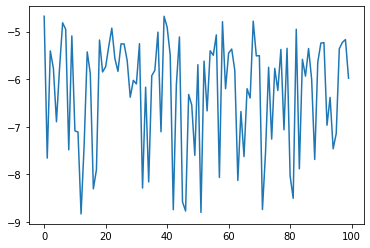

4.678648033227232
[[  1. 100.   0.]
 [  2. 200.   0.]
 [  3. 300.   0.]
 [  4. 400.   0.]
 [  5. 500.   0.]
 [  6. 600.   0.]
 [  7. 700.   0.]
 [  8. 100.  93.]
 [  9. 200.  87.]
 [ 10. 300.  93.]
 [ 11. 400.  68.]
 [ 12. 500.  82.]
 [ 13. 600.  91.]
 [ 14. 700.  95.]
 [ 15.   0.   0.]
 [ 16. 800.   0.]]


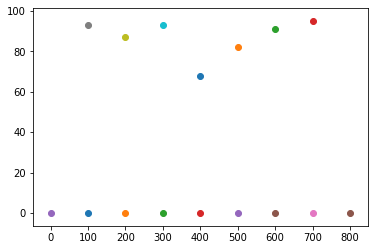

In [33]:
O=[]
MinJoint=np.zeros((nodes,3))
MIN=30
for t in range(100):
    #MIN=20 #TRUSS(joints,element,GLOBAL,Forces,small,add)
    O.append(float(TRUSS(joints,element,GLOBAL,Forces,small,add)))
    #Here You have to input which nodes you may want to move
    #joints[0][1]=0+(-1**random.randint(1,2)*random.randint(1,25))
    #joints[0][2]=0+(-1**random.randint(1,2)*random.randint(1,80))
    
    #joints[7][1]=100+(-1**random.randint(1,2)*random.randint(1,25))
    joints[7][2]=100+(-1**random.randint(1,2)*random.randint(1,10))
    
    #joints[8][1]=200+(-1**random.randint(1,2)*random.randint(1,25))
    joints[8][2]=100+(-1**random.randint(1,2)*random.randint(1,20))
    
    #joints[9][1]=300+(-1**random.randint(1,2)*random.randint(1,25))
    joints[9][2]=100+(-1**random.randint(1,2)*random.randint(1,30))
    
    #joints[10][1]=400+(-1**random.randint(1,2)*random.randint(1,25))
    joints[10][2]=100+(-1**random.randint(1,2)*random.randint(1,40))
    
    #joints[11][1]=500+(-1**random.randint(1,2)*random.randint(1,25))
    joints[11][2]=100+(-1**random.randint(1,2)*random.randint(1,30))
    
    #joints[12][1]=600+(-1**random.randint(1,2)*random.randint(1,25))
    joints[12][2]=100+(-1**random.randint(1,2)*random.randint(1,20))
    
    #joints[13][1]=700+(-1**random.randint(1,2)*random.randint(1,25))
    joints[13][2]=100+(-1**random.randint(1,2)*random.randint(1,10))
    
    #plt.scatter(joints[0][1],joints[0][2])
    #plt.scatter(joints[1][1],joints[1][2])
    #plt.scatter(joints[2][1],joints[2][2])
    if abs(TRUSS(joints,element,GLOBAL,Forces,small,add)) < MIN:
        MinJoints=joints
        MIN=abs(TRUSS(joints,element,GLOBAL,Forces,small,add))

plt.plot(O)
plt.show()
print(MIN)
print(MinJoints)
for fff in range(16):
    plt.scatter(MinJoints[fff][1],MinJoints[fff][2])
#TRUSS(joints,element,GLOBAL,Forces,small,add)
#joints[0][1]=joints[0][1]+(-1**random.randint(1,2)*random.randint(1,20))
#joints[0][2]=joints[0][2]+(-1**random.randint(1,2)*random.randint(1,20))